# Advanced NLP with spaCy
# Chapter 1: Finding words, phrases, names, and concepts

This chapter will introduce you to the basics of text processing with spaCy. You'll learn about the data structures, how to work with trained pipelines, and how to use them to predict linguistic features in your text.

Source: https://course.spacy.io/en/chapter1

# Import

In [1]:
import spacy

# Introduction to spaCy

## The nlp object

In [2]:
# create a blank English nlp object
nlp = spacy.blank("en")

# contains preprocessing pipeline
# includes language-specific rules for tokenization, etc.

## The doc object

In [3]:
# created by preprocessing a string of text with the nlp object
doc = nlp("Hello world!")

# iterate over tokjens in a doc
for token in doc:
    print(token.text)
    
# can also get a token by its index

Hello
world
!


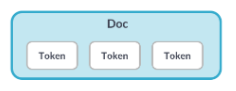

## The token object

In [4]:
# get a single token from a doc by its index
token = doc[1]

# get the token text with .text
print(token.text)

world


## The span object

In [5]:
# a slice from the doc is a span object
span = doc[1:3]

print(span.text)

world!


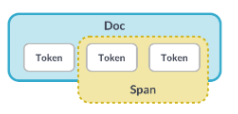

## Lexical attributes

In [6]:
doc = nlp("It costs $5.")

In [7]:
# print indices for all tokens in doc
print("Index: ", [token.i for token in doc])

Index:  [0, 1, 2, 3, 4]


In [8]:
# print text for all tokens in doc
print("Text: ", [token.text for token in doc])

Text:  ['It', 'costs', '$', '5', '.']


In [9]:
# print boolean is_alpha for all tokens in doc
print("is_alpha: ", [token.is_alpha for token in doc])

# whether token consists of alphabetic characters

is_alpha:  [True, True, False, False, False]


In [10]:
# print boolean is_punct for all tokens in doc
print("is_punct: ", [token.is_punct for token in doc])

# whether it's punctuation

is_punct:  [False, False, False, False, True]


In [11]:
# print boolean like_num for all tokens in doc
print("like_num: ", [token.like_num for token in doc])

# whether it RESEMBLES a number
# 10 = True
# ten = True

like_num:  [False, False, False, True, False]


# Getting Started

In [12]:
doc = nlp("This is a sentence.")
print(doc.text)

# can also print out whole text of a document

This is a sentence.


In [13]:
nlp = spacy.blank("de") # german

doc = nlp("Liebe Grüße!")

print(doc.text)

Liebe Grüße!


# Documents, spans, and tokens

In [14]:
nlp = spacy.blank("en")
doc = nlp("I like tree kangaroos and narwhals.")
first_token = doc[0]
print(first_token)

I


In [15]:
tree_kangaroos = doc[2:4] # span
print(tree_kangaroos)

tree kangaroos


In [16]:
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals)

tree kangaroos and narwhals


# Lexical attributes

## Look for percentages in a text

In [17]:
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

In [18]:
# iterate over tokens in the doc
for token in doc:
    
    # check if the token resembles a number
    if token.like_num:
        
        # get the next token in the doc
        next_token = doc[token.i + 1]
        
        # check if the next token is a % sign
        if next_token.text == "%":
            
            print(f"Percentage found: {token.text}{next_token}")

Percentage found: 60%
Percentage found: 4%


# Trained pipelines

In [19]:
# trained pipelines are models that enable spaCy to predict linguistic attributes IN CONTEXT, such as
# part-of-speech (POS) tags
# syntactic dependencies
# named entities

# they are trained on labeled example texts
# they can be updated with more examples to fine-tune predictions

In [20]:
# pipeline packages
# load the "en_core_web_sm" package, a small English pipeline that supports all core capabilities and is trained on web text
# assign it to an nlp object
spacy.load("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

# this package provides:
# binary weights that enable spaCy to make predictions
# vocabulary
# meta information about pipeline
# configuration file used to train the pipeline
# it tells spaCy which language class to use and how to configure the processing pipeline

## Predicting POS tags

In [21]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("She ate the pizza")

# iterate over tokens and predict the POS tag (from the trained pipeline)
for token in doc:
    print(token.text, token.pos_)
    
# attributes that return strings usually end with an underscore _
# attributes that return integer ID values don't

She PRON
ate VERB
the DET
pizza NOUN


## Predicting syntactic dependencies

In [22]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


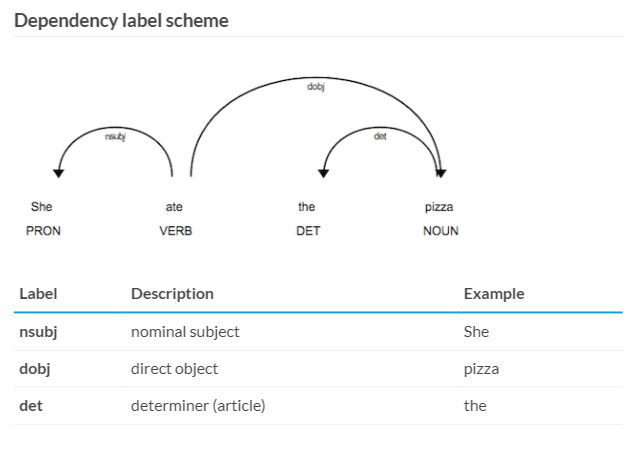

## Predicting named entities

In [23]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

# doc.ents is an iterator of span objects
for ent in doc.ents:
    print(ent.text, ent.label_)
    
# ORG = organization
# GPE = geo-political entity

Apple ORG
U.K. GPE
$1 billion MONEY


In [24]:
# use spacy.explain for tags and labels
spacy.explain("GPE")

'Countries, cities, states'

In [25]:
spacy.explain("NNP")

'noun, proper singular'

In [26]:
spacy.explain("dobj")

'direct object'

# Loading pipelines

In [27]:
nlp = spacy.load("en_core_web_sm")

text = "It's official: Apple is the first U.S. public company to reach a $1 trillion market value"

# process the text
doc = nlp(text)

# print the document text
print(doc.text)

It's official: Apple is the first U.S. public company to reach a $1 trillion market value


# Predicting linguistic annotations

In [28]:
for token in doc:
    # get the token text, POS tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
's          AUX       ccomp     
official    ADJ       acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


In [29]:
# iterate over the doc.ents and print the entity text and label attribute
for ent in doc.ents:
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY


# Predicting named entities in context

In [30]:
# when the model doesn't predict a named entity correctly, can create a span manually
text = "Upcoming iPhone X release date leaked as Apple reveals pre-orders"

doc = nlp(text)

for ent in doc.ents:
    print(ent.text, ent.label_)

# doesn't predict iPhone X

Apple ORG


In [31]:
# create span for iPhone X with indices
iphone_x = doc[1:3]

# check
iphone_x

iPhone X

# Rule-based matching

In [32]:
# spaCy's matcher lets you write rules to find words and phrases in text

# match patterns are lists of dictionaries, each one of which describes a token
# keys: names of token attributes, values: expected values

# examples of looking for match with two tokens

# look for matches by (exact) text
[{"TEXT": "iPhone"}, {"TEXT": "X"}]

# look for matches by lexical attribute
[{"LOWER": "iphone"}, {"LOWER": "x"}]

# look for matches by token attribute
[{"LEMMA": "buy"}, {"POS": "NOUN"}] # lemma matches base form (so "buy" would match "buying" or "bought")

[{'LEMMA': 'buy'}, {'POS': 'NOUN'}]

In [33]:
# using the matcher
from spacy.matcher import Matcher

In [34]:
nlp = spacy.load("en_core_web_sm")

# give vocab from trained pipeline to matcher
matcher = Matcher(nlp.vocab)

# add pattern to matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", [pattern]) # must wrap pattern(s) in a list; can add multiple patterns

# process text
doc = nlp("Upcoming iPhone X release date leaked")

# call matcher on doc
matches = matcher(doc)

matches # this returns a list of tuples of form (match_id (hash value of pattern name), start index in doc, end index in doc)

[(9528407286733565721, 1, 3)]

In [35]:
# iterate over matches and get spans
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


In [36]:
# matching lexical attributes

pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]

matcher.add("NUM_FIFA_WORLD_CUP_PUNC_PATTERN", [pattern])

doc = nlp("2018 FIFA World Cup: France won!")

matches = matcher(doc)

matches

[(5383322790545208969, 0, 5)]

In [37]:
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

2018 FIFA World Cup:


In [38]:
# matching other token attributes

pattern = [
    {"LEMMA": "love", "POS": "VERB"},
    {"POS": "NOUN"}
]

matcher.add("LOVE_NOUN_PATTERN", [pattern])

doc = nlp("I loved dogs but now I love cats more.")

matches = matcher(doc)

matches

[(7253449245750226361, 1, 3), (7253449245750226361, 6, 8)]

In [39]:
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

loved dogs
love cats


In [40]:
# using operators and quantifiers
# they let you define how often a token should be matched
# added using the OP key in the pattern dictionaries

# the "?" operator makes the dictionary optional in the pattern

pattern = [
    {"LEMMA": "buy"},
    {"POS": "DET", "OP": "?"},  # optional: match 0 or 1 times
    {"POS": "NOUN"}
]

matcher.add("BUY_(DET)_NOUN_PATTERN", [pattern])

doc = nlp("I bought a smartphone. Now I'm buying apps.")

matches = matcher(doc)

matches

[(10860532500283523305, 1, 4), (10860532500283523305, 8, 10)]

In [41]:
for match_id, start, end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

bought a smartphone
buying apps


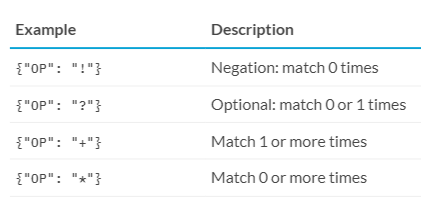

# Using the matcher

In [42]:
import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")

# process text
doc = nlp("Upcoming iPhone X release date leaked as Apple reveals pre-orders")

# initialize matcher and give vocab from trained pipeline to matcher
matcher = Matcher(nlp.vocab)

# define pattern to match
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]

# add pattern to matcher
matcher.add("IPHONE_X_PATTERN", [pattern]) # must wrap pattern(s) in a list; can add multiple patterns

# call matcher on doc
matches = matcher(doc)

print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


# Writing match patterns

In [43]:
# instructions: Write one pattern that only matches mentions of the full iOS versions: “iOS 7”, “iOS 11” and “iOS 10”.

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "After making the iOS update you won't notice a radical system-wide "
    "redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of "
    "iOS 11's furniture remains the same as in iOS 10. But you will discover "
    "some tweaks once you delve a little deeper."
)

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{"TEXT": "iOS"}, {"IS_DIGIT": True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("IOS_VERSION_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


In [44]:
# instructions: Write one pattern that only matches forms of “download” (tokens with the lemma “download”), 
# followed by a token with the part-of-speech tag "PROPN" (proper noun).

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "i downloaded Fortnite on my laptop and can't open the game at all. Help? "
    "so when I was downloading Minecraft, I got the Windows version where it "
    "is the '.zip' folder and I used the default program to unpack it... do "
    "I also need to download Winzip?"
)

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{"LEMMA": "download"}, {"POS": "PROPN"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("DOWNLOAD_THINGS_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [45]:
# instructions: Write one pattern that matches adjectives ("ADJ") followed by one or two "NOUN"s 
# (one noun and one optional noun).

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
matcher = Matcher(nlp.vocab)

doc = nlp(
    "Features of the app include a beautiful design, smart search, automatic "
    "labels and optional voice responses."
)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": "ADJ"}, {"POS": "NOUN"}, {"POS": "NOUN", "OP": "*"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", [pattern])
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print("Match found:", doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses
